In [29]:
%matplotlib inline

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
import pydotplus
from sklearn import tree
from IPython.display import Image

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

print("Librerie importate con successo.")

Librerie importate con successo.


In [30]:
df = pd.read_csv(r"C:\Users\Mario\Desktop\UniPi\2° semestre\DM2\progetto\merged_echo.csv", index_col=0, header=[0,1])

In [31]:
df.head()

audio_features                                                    \
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                             track  
         speechiness    tempo   valence popularity  
track_id                                            
2           0.159310  165.922  0.576661          0  
3           0.461818  126.957  0.269240          0  
5           0.124595  100.260  0.621661          0  
10          0.032985  111.562  0.963590          1  
134         0.525519  114.290  0.894072          0

In [32]:
df.shape

(13129, 9)

In [33]:
df.columns

MultiIndex([('audio_features',     'acousticness'),
            ('audio_features',     'danceability'),
            ('audio_features',           'energy'),
            ('audio_features', 'instrumentalness'),
            ('audio_features',         'liveness'),
            ('audio_features',      'speechiness'),
            ('audio_features',            'tempo'),
            ('audio_features',          'valence'),
            (         'track',       'popularity')],
           )

In [34]:
df = df[[col for col in df.columns if col != ('audio_features','tempo')]]
df.columns

MultiIndex([('audio_features',     'acousticness'),
            ('audio_features',     'danceability'),
            ('audio_features',           'energy'),
            ('audio_features', 'instrumentalness'),
            ('audio_features',         'liveness'),
            ('audio_features',      'speechiness'),
            ('audio_features',          'valence'),
            (         'track',       'popularity')],
           )

In [35]:
# DISTRIBUZIONE DELLA TARGET VARIABLE

zero, uno = df["track","popularity"].value_counts()

print("0: {}%".format(round((zero/len(df))*100)))
print("1: {}%".format(round((uno/len(df))*100)))

0: 79%
1: 21%


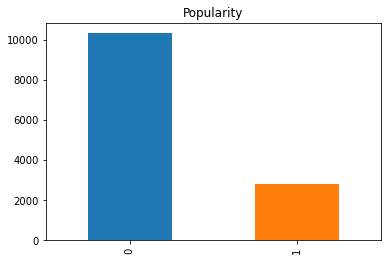

In [36]:
df["track","popularity"].value_counts().plot(kind='bar', color=("C0", "C1")).set_title("Popularity")
plt.show()

In [37]:
target = ("track","popularity")

In [38]:
#Divido df in test e train
 
attributes = [col for col in df.columns if col != target]

X = df[attributes].values
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [39]:
X_train.shape, X_test.shape

((9190, 7), (3939, 7))

Documentazione DecisionTreeClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Parameter tuning

In [40]:
clf = DecisionTreeClassifier(criterion='gini', 
                             max_depth=4, 
                             min_samples_leaf=1,
                             min_samples_split=2)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [41]:
#Importances of attributes

for col, imp in zip(attributes, clf.feature_importances_):
    print(col,":", imp)

('audio_features', 'acousticness') : 0.437795523249905
('audio_features', 'danceability') : 0.14945646883934435
('audio_features', 'energy') : 0.2057826174021983
('audio_features', 'instrumentalness') : 0.09693906042339968
('audio_features', 'liveness') : 0.009417642274915648
('audio_features', 'speechiness') : 0.07278737492154928
('audio_features', 'valence') : 0.02782131288868778


<b>Precision</b>: fraction of relevant instances among the retrieved instances (misura di esattezza o fedeltà). Indica il numero di veri positivi diviso il numero totale di elementi etichettati come appartenenti alla classe TP/(TP+FP)

<b>Recall</b>: fraction of relevant instances that were retrieved (misura di completezza). Indica il numero di veri positivi diviso il numero totale di elementi che effettivamente appartengono alla classe TP/(TP+FN)

### TRAIN

In [42]:
y_pred0 = clf.predict(X_train)

print("\t\t\t---- TRAIN ----\n")
print('Accuracy %s' % accuracy_score(y_train, y_pred0))
print('F1-score %s' % f1_score(y_train, y_pred0, average=None))
print(classification_report(y_train, y_pred0))

			---- TRAIN ----

Accuracy 0.7928182807399348
F1-score [0.88275862 0.11028037]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      7228
           1       0.66      0.06      0.11      1962

    accuracy                           0.79      9190
   macro avg       0.73      0.53      0.50      9190
weighted avg       0.77      0.79      0.72      9190



### TEST

In [43]:
y_pred0 = clf.predict(X_test)

print("\t\t\t---- TEST ----\n")
print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

			---- TEST ----

Accuracy 0.7915714648387916
F1-score [0.88215875 0.09879254]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3098
           1       0.64      0.05      0.10       841

    accuracy                           0.79      3939
   macro avg       0.72      0.52      0.49      3939
weighted avg       0.76      0.79      0.71      3939



In [44]:
# CROSS VALIDATION

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7852 (+/- 0.02)
F1-score: 0.4718 (+/- 0.04)


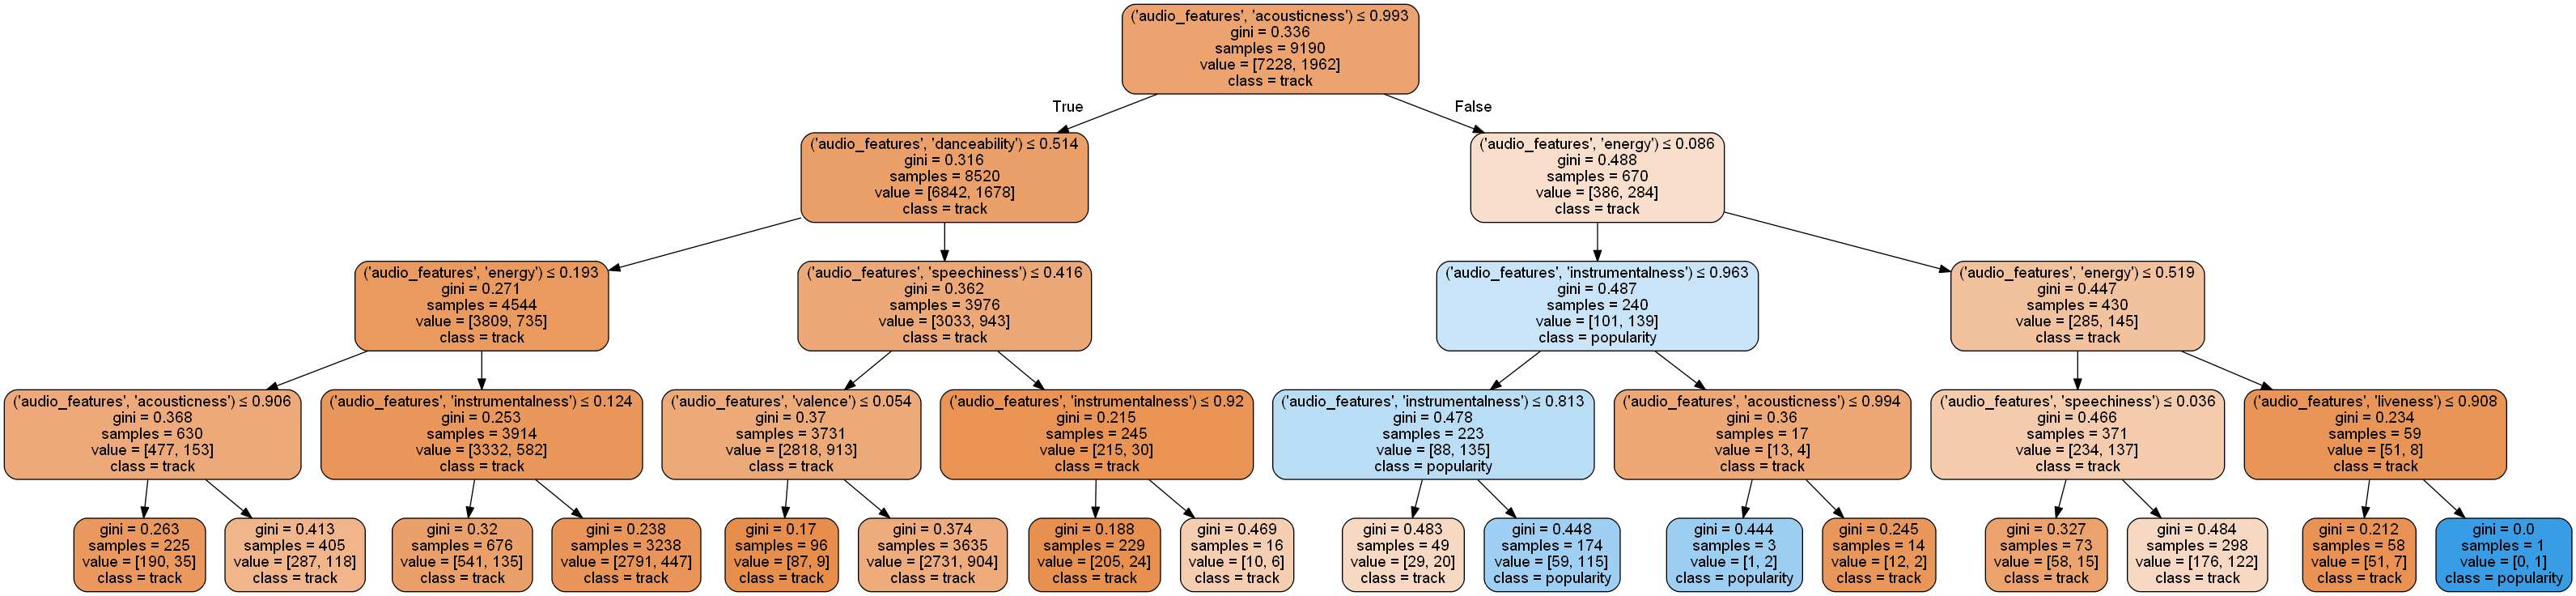

In [45]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=target,  
                                filled=True, rounded=True,  
                                special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [46]:
'''

# GRID SEARCH

param_dict = {'criterion': ['gini','entropy'],
              'max_depth': range(1,10),
              'min_samples_leaf': [1, 10, 20, 30, 40, 50],
              'min_samples_split': [2, 10, 20, 30, 40, 50]}

grid_search = GridSearchCV(clf, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
grid_search.fit(X, y)


print("------------------------")
print("Best parameters: ",grid_search.best_params_)
print("------------------------")
print("Best estimator: ",grid_search.best_estimator_)
print("------------------------")
print("Best score: ",grid_search.best_score_)
print("------------------------")

'''

'\n\n# GRID SEARCH\n\nparam_dict = {\'criterion\': [\'gini\',\'entropy\'],\n              \'max_depth\': range(1,10),\n              \'min_samples_leaf\': [1, 10, 20, 30, 40, 50],\n              \'min_samples_split\': [2, 10, 20, 30, 40, 50]}\n\ngrid_search = GridSearchCV(clf, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)\ngrid_search.fit(X, y)\n\n\nprint("------------------------")\nprint("Best parameters: ",grid_search.best_params_)\nprint("------------------------")\nprint("Best estimator: ",grid_search.best_estimator_)\nprint("------------------------")\nprint("Best score: ",grid_search.best_score_)\nprint("------------------------")\n\n'

### ROC curve

In [47]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

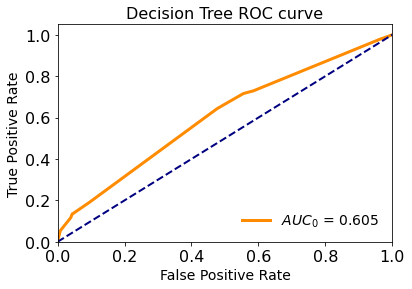

In [48]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Decision Tree ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [49]:
blablabla

NameError: name 'blablabla' is not defined

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_train.shape

In [ ]:
# Sbilancia artificialmente il dataset

pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [ ]:
X_pca.shape

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

# Random Undersampling

In [ ]:
# Installazione della libreria imblearn: conda install -c conda-forge imbalanced-learn

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=2, 
                             min_samples_split=2,
                             min_samples_leaf=1)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# CondensedNearestNeighbour

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=2, 
                             min_samples_split=2,
                             min_samples_leaf=1)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# RANDOM OVERSAMPLING

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=2, 
                             min_samples_split=2,
                             min_samples_leaf=1)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=2, 
                             min_samples_split=2,
                             min_samples_leaf=1)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Scikit-plot

In [ ]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [ ]:
#Divido df in test e train
attributes = [col for col in df.columns if col != target]
X = df[attributes].values
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

clf = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=4, 
                             min_samples_split=2,
                             min_samples_leaf=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
plot_roc(y_test, y_score)
plt.show()

In [ ]:
plot_precision_recall(y_test, y_score)
plt.show()

The dashed line is a reference line. For any given number of cases (the x-axis value), it represents the expected number of positives we would predict if we did not have a model but simply selected cases at random. It provides a benchmark against which we can see performance of the model.

In [ ]:
plot_cumulative_gain(y_test, y_score)
plt.show()

Gain or lift is a measure of the effectiveness of a classification model calculated as the ratio between the results obtained with and without the model. Gain and lift charts are visual aids for evaluating performance of classification models. However, in contrast to the confusion matrix that evaluates models on the whole population, gain or lift chart evaluates model performance in a portion of the population. 

A lift chart graphically represents the improvement that a mining model provides when compared against a random guess, and measures the change in terms of a lift score. By comparing the lift scores for different models, you can determine which model is best. You can also determine the point at which the model's predictions become less useful. For example, by reviewing the lift chart, you might realize that a promotional campaign is likely to be effective against only 30% of your customers, and use that figure to limit the scope of the campaign.

Any improvement from the random guess is considered to be lift.

In [ ]:
# Sull'asse x i valori vanno da 0% a 100%

plot_lift_curve(y_test, y_score)
plt.show()

